# **Layout Generation for Mumbai**

In [ ]:
import numpy as np 
# total population size
Population = 206340
# Children, Adults and Seniors
Demography_dist = np.array([0.2206,0.7212,1-(0.2206+0.7212)])
out = np.random.choice(len(Demography_dist), size=Population, p=Demography_dist)
_, Demography = np.unique(out, return_counts=True)

Households = 46100
Households_dist = np.array([0.0485,0.103,0.1715,0.2589,0.1819,0.1035,0.1327])
out = np.random.choice(len(Households_dist), size=Households, p=Households_dist)
_, Household_size_distribution = np.unique(out, return_counts=True)

def distributeHouseholds(Population, Household_size_distribution):
    Household_value = np.arange(len(Household_size_distribution))+1
    remaining = Population-(Household_value*Household_size_distribution)[:-1].sum()
    out = np.random.choice(14, size=remaining)
    remaining_value, remaining_count = np.unique(out, return_counts=True)
    remaining_value+=7
    remaining_households_size_dist = (remaining_count/remaining_value).round()

    total_households_size_dist = np.concatenate((Household_size_distribution[:-1], remaining_households_size_dist)).astype(np.int)
    population_count = np.arange(20)+1
    pred_population = (population_count*total_households_size_dist).sum() 
    diff = Population-pred_population

    while(diff!=0):
        sign = 1 if diff>0 else -1
        diff = abs(diff)
        d, r = diff//20, diff%20
        total_households_size_dist[19]+=d*(sign)
        total_households_size_dist[r-1]+=(sign)
        diff-=(d*20+r)
    return total_households_size_dist

new_Household_size_distribution = distributeHouseholds(Population, Household_size_distribution)
population_count = np.arange(20)+1
pred_population = (population_count*new_Household_size_distribution).sum()
print(pred_population, Population)

206340 206340


In [ ]:
np.sum(new_Household_size_distribution)

44277

In [ ]:
Demography_dist*Population

array([ 45518.604, 148812.408,  12008.988])

In [ ]:
import numpy as np
Population = 206340
households = 44310
household_size = np.zeros(households,dtype=np.int)
household_numbers_by_size = np.array([2217,4720,7983,12027,8394,4658,532,470,407,375,337,320,285,270,255,241,223,208,197,191])
age_composition = np.array([[0,1725,492],[150,7698,1592],[3055,19749,1145],[10579,36083,1446],[10058,29600,2312],
                            [7511,18697,1740],[1002,2491,231],[1010,2515,235],[984,2451,228],[1008,2508,234],
                            [996,2480,231],[1032,2569,239],[996,2478,231],[1016,2529,235],[1028,2559,238],
                            [1036,2580,240],[1019,2536,236],[1006,2505,233],[1006,2504,233],[1027,2555,238]])
# Number of Children, Adults and Seniors
Demography = np.array([ 45519, 148812,  12009])
Age = np.zeros(Population,dtype=np.int)
Age[:Demography[1]] = 1
Age[Demography[1]:np.sum(Demography[1:])] = 2
Age_House = np.zeros(Population,dtype=np.int)
Children = np.where(Age==0)[0]
Adults = np.where(Age==1)[0]
Seniors = np.where(Age==2)[0]
for i in range(19):
  Age_House[Children[np.sum(age_composition[:(i+1),0]):np.sum(age_composition[:(i+2),0])]]=i+2 
  Age_House[Adults[np.sum(age_composition[:(i+1),1]):np.sum(age_composition[:(i+2),1])]]=i+2 
  Age_House[Seniors[np.sum(age_composition[:(i+1),2]):np.sum(age_composition[:(i+2),2])]]=i+2 
House_number = np.zeros(Population,dtype=np.int)
house_sum=np.zeros(20,dtype=np.int)
house_sum[0] = household_numbers_by_size[0]
for i in range(1,20):
  house_sum[i] = np.sum(household_numbers_by_size[:i+1])
for j in range(1,20):
  x=np.where(Age_House==j+1)[0]
  np.random.shuffle(x)
  y=np.arange(household_numbers_by_size[j]*(j+1)+(j+1),step=j+1)
  for k in range(household_numbers_by_size[j]):
    House_number[x[y[k]:y[k+1]]]= house_sum[j-1]+k  
House_number[Age_House==0]=np.arange(household_numbers_by_size[0])

In [ ]:
np.where(Age_House==1)

(array([], dtype=int64),)

In [ ]:
import numpy as np
import random as r
import matplotlib.pyplot as plt
import uuid as u
from matplotlib import animation
%matplotlib inline
from enum import IntEnum
from enum import Enum
from IPython.display import HTML
import seaborn as sns
import pandas as pd
from google.colab import files

In [ ]:
class Square_Layout(IntEnum):
    """
    Details of the Layout 
    """
    # Length of the square box
    xmin = 0
    xmax = 5000 
    ymin = 0
    ymax = 2000 
    Lspace = 500
    # Number of grids
    G = xmax/Lspace * ymax/Lspace
    # Number of grids occupied
    nmin = 0.75*G
    nmax = G
    
class Population(IntEnum):
    """
    Details of the Population
    """
    # Population
    N = 206340
    households = 44310

In [ ]:
def random_sum_to(n,num_terms):
    a = r.sample(range(1, n), num_terms) + [0, n]
    list.sort(a)
    return [a[i+1] - a[i] for i in range(len(a) - 1)]

def generate(count, lower_limits, upper_limits):
    width = upper_limits - lower_limits
    return (lower_limits + np.random.rand(1, count) * width)

def Grid():
    """
    Details of the location of agents
    """
    num_terms = r.randint(Square_Layout.nmin, Square_Layout.nmax)
    # Number per grid
    density = np.zeros(Square_Layout.G,dtype = np.int)
    # Density
    density[r.sample(range(0, Square_Layout.G), num_terms+1)] = random_sum_to(Population.households,num_terms)
    # Position limits
    xlimits = np.linspace(Square_Layout.xmin,Square_Layout.xmax,num = Square_Layout.xmax//Square_Layout.Lspace + 1,endpoint = True)
    limit_list = []
    for i in range(0,np.size(xlimits)-1):
      limit_list.append((xlimits[i],xlimits[i+1]))
    grid = np.reshape(density,(Square_Layout.xmax//Square_Layout.Lspace,Square_Layout.ymax//Square_Layout.Lspace))
    return density, grid, limit_list

def Location(density,grid,limit_list):
    """
    Location of agents
    """
    # Location of agents
    x_location = np.zeros(Population.households,dtype = np.float)
    y_location = np.zeros(Population.households,dtype = np.float)
    indices = list(range(0,Population.households))
    r.shuffle(indices)
    cum = np.append(0,np.cumsum(density))
    c = 0
    block=np.zeros(Population.households,dtype=np.int)
    for i in range(0,Square_Layout.xmax//Square_Layout.Lspace):
        for j in range(0,Square_Layout.ymax//Square_Layout.Lspace):
            x_location[indices[cum[c]:cum[c+1]]] = np.random.uniform(limit_list[i][0],limit_list[i][1],grid[i,j])
            y_location[indices[cum[c]:cum[c+1]]] = np.random.uniform(limit_list[j][0],limit_list[j][1],grid[i,j])
            block[indices[cum[c]:cum[c+1]]] = c
            c+=1            
    return x_location,y_location,block
grid = Grid()
loc = Location(grid[0],grid[1],grid[2])  
# Limits for each block
x = []
limit_list = grid[2]
for i in range(0,Square_Layout.xmax//Square_Layout.Lspace):
    for j in range(0,Square_Layout.xmax//Square_Layout.Lspace):
        x.append([limit_list[j][0],limit_list[j][1],limit_list[i][0],limit_list[i][1]])  
#data = np.column_stack((loc[0], loc[1])) 
Agents_X = loc[0][House_number] + np.random.uniform(-5,5,(Population.N))
Agents_Y = loc[1][House_number] + np.random.uniform(-5,5,(Population.N))
Agents_X[np.where(Agents_X>5000)] = np.random.uniform(4995,5000,(Population.N))[np.where(Agents_X>5000)[0]]
Agents_X[np.where(Agents_X<0)] = np.random.uniform(0,5,(Population.N))[np.where(Agents_X<0)[0]]
Agents_Y[np.where(Agents_Y>2000)] = np.random.uniform(1995,2000,(Population.N))[np.where(Agents_Y>2000)[0]]
Agents_Y[np.where(Agents_Y<0)] = np.random.uniform(0,5,(Population.N))[np.where(Agents_Y<0)[0]]

In [ ]:
from google.colab import files
import numpy as np
uploaded = files.upload()
data = np.loadtxt('mumbai_agent_location.dat')

Saving mumbai_agent_location.dat to mumbai_agent_location (1).dat


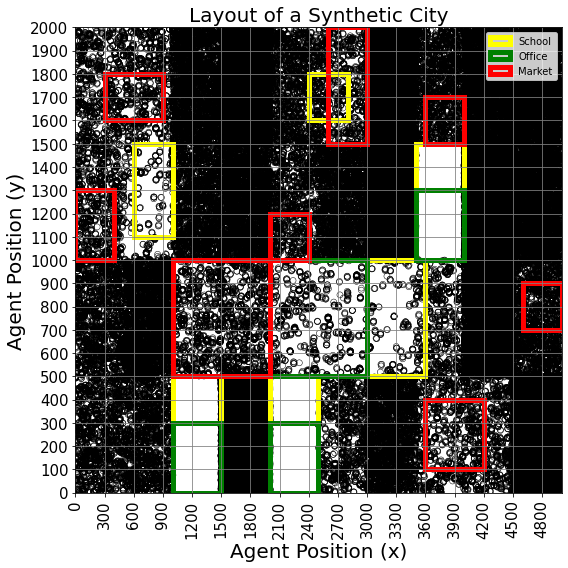

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(121)
axes = plt.axes(xlim=(0, 5000), ylim=(0, 2000),xticks=np.arange(0, 5100, step=100),yticks=np.arange(0, 2100, step=100))
plt.xticks(fontsize=15,rotation=90)
axes.set_xticks(axes.get_xticks()[::3])
plt.yticks(fontsize=15)
axes.grid(color='grey', linestyle='-')
axes.scatter(data[:,0],data[:,1],marker='o',facecolor='none',edgecolor = 'k', lw=0.5)
# Schools
axes.add_patch(Rectangle((1000, 300), 500, 200,ec="yellow",fc='None',lw=5,label='School'))
axes.add_patch(Rectangle((2000, 300), 500, 200,ec="yellow",fc='None',lw=5))
axes.add_patch(Rectangle((3000, 500), 600, 500,ec="yellow",fc='None',lw=5))
axes.add_patch(Rectangle((3500, 1300), 500, 200,ec="yellow",fc='None',lw=5))
axes.add_patch(Rectangle((600, 1100), 400, 400,ec="yellow",fc='None',lw=5))
axes.add_patch(Rectangle((2400, 1600), 400, 200,ec="yellow",fc='None',lw=5))
# Offices
axes.add_patch(Rectangle((1000, 0), 500, 300,ec="green",fc='None',lw=5,label='Office'))
axes.add_patch(Rectangle((2000, 0), 500, 300,ec="green",fc='None',lw=5))
axes.add_patch(Rectangle((3500, 1000), 500, 300,ec="green",fc='None',lw=5))
axes.add_patch(Rectangle((2000, 500), 1000, 500,ec="green",fc='None',lw=5))
# Markets
axes.add_patch(Rectangle((2600, 1500), 400, 500,ec="red",fc='None',lw=5,label='Market'))
axes.add_patch(Rectangle((3600, 100), 600, 300,ec="red",fc='None',lw=5))
axes.add_patch(Rectangle((4600, 700), 400, 200,ec="red",fc='None',lw=5))
axes.add_patch(Rectangle((2000, 1000), 400, 200,ec="red",fc='None',lw=5))
axes.add_patch(Rectangle((0, 1000), 400, 300,ec="red",fc='None',lw=5))
axes.add_patch(Rectangle((3600, 1500), 400, 200,ec="red",fc='None',lw=5))
axes.add_patch(Rectangle((1000, 500), 1000, 500,ec="red",fc='None',lw=5))
axes.add_patch(Rectangle((300, 1600), 600, 200,ec="red",fc='None',lw=5))

axes.legend(loc='upper right')
plt.title('Layout of a Synthetic City',fontsize=20)
plt.xlabel('Agent Position (x)',fontsize=20)
plt.ylabel('Agent Position (y)',fontsize=20)
plt.tight_layout()

In [ ]:
plt.savefig('Mumbai_Layout_Scatter.pdf',format='pdf', bbox_inches='tight',Transparent=True)
files.download('Mumbai_Layout_Scatter.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

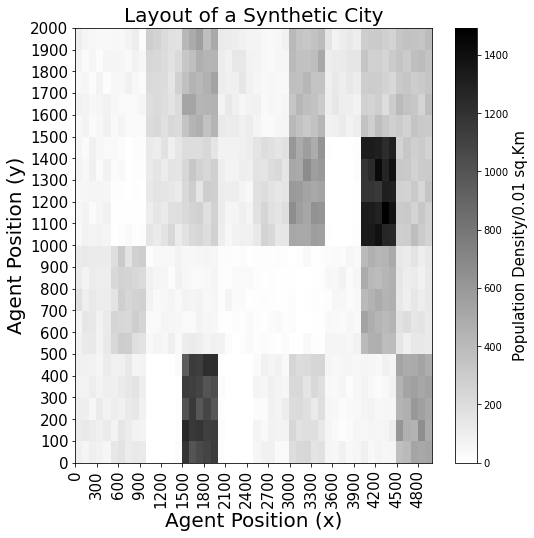

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(122)
axes = plt.axes(xlim=(0, 5000), ylim=(0, 2000),xticks=np.arange(0, 5100, step=100),yticks=np.arange(0, 2100, step=100))
plt.xticks(fontsize=15,rotation=90)
axes.set_xticks(axes.get_xticks()[::3])
plt.yticks(fontsize=15)
axes.grid(color='grey', linestyle='-')
plt.hist2d(data[:,0],data[:,1],bins=bins, cmap=plt.cm.binary)
cb=plt.colorbar()
plt.title('Layout of a Synthetic City',fontsize=20)
plt.xlabel('Agent Position (x)',fontsize=20)
plt.ylabel('Agent Position (y)',fontsize=20)
cb.set_label('Population Density/0.01 sq.Km',fontsize=15)

In [ ]:
plt.savefig('Mumbai_Layout_Heat.pdf',format='pdf', bbox_inches='tight',Transparent=True)
files.download('Mumbai_Layout_Heat.pdf')

In [ ]:
from google.colab import files
uploaded = files.upload()
data = np.loadtxt('mumbai_agent_location.dat')

Saving mumbai_agent_location.dat to mumbai_agent_location (1).dat


In [ ]:
household_position = np.column_stack((loc[0], loc[1]))
agent_position = np.column_stack((Agents_X, Agents_Y))
np.savetxt('mumbai_household_location.dat', household_position)
np.savetxt('mumbai_agent_location.dat',agent_position)
np.savetxt('mumbai_block.dat', loc[2])
np.savetxt('mumbai_griddensity.dat', grid[1])
np.savetxt('mumbai_gridlimit.dat', grid[2])
np.savetxt('mumbai_blocklimit.dat',x)
np.savetxt('mumbai_Age.dat',Age)
np.savetxt('mumbai_Age_House.dat',Age_House)
np.savetxt('mumbai_House_number.dat',House_number)
np.savetxt('mumbai_House_sum.dat',house_sum)
np.savetxt('mumbai_house_numbers_size.dat',household_numbers_by_size)

In [ ]:
files.download('mumbai_household_location.dat')
files.download('mumbai_agent_location.dat')
files.download('mumbai_block.dat')
files.download('mumbai_griddensity.dat')
files.download('mumbai_gridlimit.dat')
files.download('mumbai_blocklimit.dat')
files.download('mumbai_Age.dat')
files.download('mumbai_Age_House.dat')
files.download('mumbai_House_number.dat')
files.download('mumbai_House_sum.dat')
files.download('mumbai_house_numbers_size.dat')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Bangalore**

In [ ]:
import numpy as np 
# total population size
Population = 108720
# Children, Adults and Seniors
Demography_dist = np.array([0.2278,0.7239,1-(0.2278+0.7239)])
out = np.random.choice(len(Demography_dist), size=Population, p=Demography_dist)
_, Demography = np.unique(out, return_counts=True)

Households = 26560
Households_dist = np.array([0.0417,0.1308,0.2228,0.3077,0.153,0.0726,0.0714])
out = np.random.choice(len(Households_dist), size=Households, p=Households_dist)
_, Household_size_distribution = np.unique(out, return_counts=True)

def distributeHouseholds(Population, Household_size_distribution):
    Household_value = np.arange(len(Household_size_distribution))+1
    remaining = Population-(Household_value*Household_size_distribution)[:-1].sum()
    out = np.random.choice(14, size=remaining)
    remaining_value, remaining_count = np.unique(out, return_counts=True)
    remaining_value+=7
    remaining_households_size_dist = (remaining_count/remaining_value).round()

    total_households_size_dist = np.concatenate((Household_size_distribution[:-1], remaining_households_size_dist)).astype(np.int)
    population_count = np.arange(20)+1
    pred_population = (population_count*total_households_size_dist).sum() 
    diff = Population-pred_population

    while(diff!=0):
        sign = 1 if diff>0 else -1
        diff = abs(diff)
        d, r = diff//20, diff%20
        total_households_size_dist[19]+=d*(sign)
        total_households_size_dist[r-1]+=(sign)
        diff-=(d*20+r)
    return total_households_size_dist

new_Household_size_distribution = distributeHouseholds(Population, Household_size_distribution)
population_count = np.arange(20)+1
pred_population = (population_count*new_Household_size_distribution).sum()
print(pred_population, Population)

108720 108720


In [ ]:
np.sum(new_Household_size_distribution)

11472

In [ ]:
import numpy as np
Population = 108720
households = 26560
household_size = np.zeros(households,dtype=np.int)
household_numbers_by_size = np.array([1143,3599,5967,8369,4169,1984,163,144,129,114,106,97,90,80,80,71,68,66,61,60])
age_composition = np.array([[0,920,223],[134,6005,1059],[2568,14610,723],[8156,24484,836],[5540,14349,956],
                            [3538,7751,615],[339,743,59],[342,750,60],[345,756,60],[339,742,59],
                            [347,759,60],[346,758,60],[348,762,60],[333,729,58],[357,781,62],
                            [337,740,59],[343,753,60],[353,774,61],[344,755,60],[357,781,62]])
# Number of Children, Adults and Seniors
Demography = np.array([ 24766,78702,5252])
Age = np.zeros(Population,dtype=np.int)
Age[:Demography[1]] = 1
Age[Demography[1]:np.sum(Demography[1:])] = 2
Age_House = np.zeros(Population,dtype=np.int)
Children = np.where(Age==0)[0]
Adults = np.where(Age==1)[0]
Seniors = np.where(Age==2)[0]
for i in range(19):
  Age_House[Children[np.sum(age_composition[:(i+1),0]):np.sum(age_composition[:(i+2),0])]]=i+2 
  Age_House[Adults[np.sum(age_composition[:(i+1),1]):np.sum(age_composition[:(i+2),1])]]=i+2 
  Age_House[Seniors[np.sum(age_composition[:(i+1),2]):np.sum(age_composition[:(i+2),2])]]=i+2 
House_number = np.zeros(Population,dtype=np.int)
house_sum=np.zeros(20,dtype=np.int)
house_sum[0] = household_numbers_by_size[0]
for i in range(1,20):
  house_sum[i] = np.sum(household_numbers_by_size[:i+1])
for j in range(1,20):
  x=np.where(Age_House==j+1)[0]
  np.random.shuffle(x)
  y=np.arange(household_numbers_by_size[j]*(j+1)+(j+1),step=j+1)
  for k in range(household_numbers_by_size[j]):
    House_number[x[y[k]:y[k+1]]]= house_sum[j-1]+k  
House_number[Age_House==0]=np.arange(household_numbers_by_size[0])

In [ ]:
np.sum(age_composition,1)

array([ 1143,  7198, 17901, 33476, 20845, 11904,  1141,  1152,  1161,
        1140,  1166,  1164,  1170,  1120,  1200,  1136,  1156,  1188,
        1159,  1200])

In [ ]:
class Square_Layout(IntEnum):
    """
    Details of the Layout 
    """
    # Length of the square box
    xmin = 0
    xmax = 5000 
    ymin = 0
    ymax = 2000 
    Lspace = 500
    # Number of grids
    G = xmax/Lspace * ymax/Lspace
    # Number of grids occupied
    nmin = 0.75*G
    nmax = G
    
class Population(IntEnum):
    """
    Details of the Population
    """
    # Population
    N = 108720
    households = 26560  

In [ ]:
def random_sum_to(n,num_terms):
    a = r.sample(range(1, n), num_terms) + [0, n]
    list.sort(a)
    return [a[i+1] - a[i] for i in range(len(a) - 1)]

def generate(count, lower_limits, upper_limits):
    width = upper_limits - lower_limits
    return (lower_limits + np.random.rand(1, count) * width)

def Grid():
    """
    Details of the location of agents
    """
    num_terms = r.randint(Square_Layout.nmin, Square_Layout.nmax)
    # Number per grid
    density = np.zeros(Square_Layout.G,dtype = np.int)
    # Density
    density[r.sample(range(0, Square_Layout.G), num_terms+1)] = random_sum_to(Population.households,num_terms)
    # Position limits
    xlimits = np.linspace(Square_Layout.xmin,Square_Layout.xmax,num = Square_Layout.xmax//Square_Layout.Lspace + 1,endpoint = True)
    limit_list = []
    for i in range(0,np.size(xlimits)-1):
      limit_list.append((xlimits[i],xlimits[i+1]))
    grid = np.reshape(density,(Square_Layout.xmax//Square_Layout.Lspace,Square_Layout.ymax//Square_Layout.Lspace))
    return density, grid, limit_list

def Location(density,grid,limit_list):
    """
    Location of agents
    """
    # Location of agents
    x_location = np.zeros(Population.households,dtype = np.float)
    y_location = np.zeros(Population.households,dtype = np.float)
    indices = list(range(0,Population.households))
    r.shuffle(indices)
    cum = np.append(0,np.cumsum(density))
    c = 0
    block=np.zeros(Population.households,dtype=np.int)
    for i in range(0,Square_Layout.xmax//Square_Layout.Lspace):
        for j in range(0,Square_Layout.ymax//Square_Layout.Lspace):
            x_location[indices[cum[c]:cum[c+1]]] = np.random.uniform(limit_list[i][0],limit_list[i][1],grid[i,j])
            y_location[indices[cum[c]:cum[c+1]]] = np.random.uniform(limit_list[j][0],limit_list[j][1],grid[i,j])
            block[indices[cum[c]:cum[c+1]]] = c
            c+=1            
    return x_location,y_location,block
grid = Grid()
loc = Location(grid[0],grid[1],grid[2])  
# Limits for each block
x = []
limit_list = grid[2]
for i in range(0,Square_Layout.xmax//Square_Layout.Lspace):
    for j in range(0,Square_Layout.xmax//Square_Layout.Lspace):
        x.append([limit_list[j][0],limit_list[j][1],limit_list[i][0],limit_list[i][1]])  
#data = np.column_stack((loc[0], loc[1])) 
Agents_X = loc[0][House_number] + np.random.uniform(-5,5,(Population.N))
Agents_Y = loc[1][House_number] + np.random.uniform(-5,5,(Population.N))
Agents_X[np.where(Agents_X>5000)] = np.random.uniform(4995,5000,(Population.N))[np.where(Agents_X>5000)[0]]
Agents_X[np.where(Agents_X<0)] = np.random.uniform(0,5,(Population.N))[np.where(Agents_X<0)[0]]
Agents_Y[np.where(Agents_Y>2000)] = np.random.uniform(1995,2000,(Population.N))[np.where(Agents_Y>2000)[0]]
Agents_Y[np.where(Agents_Y<0)] = np.random.uniform(0,5,(Population.N))[np.where(Agents_Y<0)[0]]

In [ ]:
data = np.loadtxt('blore_agent_location.dat')

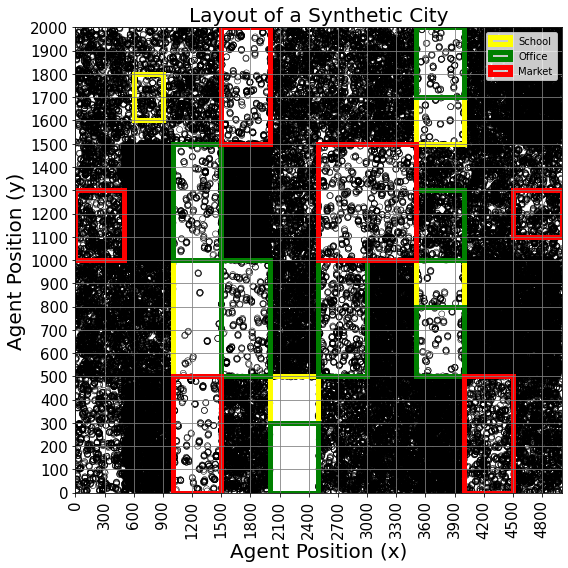

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(121)
axes = plt.axes(xlim=(0, 5000), ylim=(0, 2000),xticks=np.arange(0, 5100, step=100),yticks=np.arange(0, 2100, step=100))
plt.xticks(fontsize=15,rotation=90)
axes.set_xticks(axes.get_xticks()[::3])
plt.yticks(fontsize=15)
axes.grid(color='grey', linestyle='-')
axes.scatter(data[:,0],data[:,1],marker='o',facecolor='none',edgecolor = 'k', lw=0.5)
# Schools
School = [[1000,1500,500,1000],[1000,1500,0,500],[1500,2000,1500,2000],
          [0,500,1000,1300],[4500,5000,1100,1300],[3500,4000,1500,1700],
          [4000,4500,0,500],[3500,4000,800,1000],[600,900,1600,1800]]
axes.add_patch(Rectangle((1000, 500), 500, 500,ec="yellow",fc='None',lw=5,label='School'))
axes.add_patch(Rectangle((2000, 300), 500, 200,ec="yellow",fc='None',lw=5))
axes.add_patch(Rectangle((3500, 800), 500, 200,ec="yellow",fc='None',lw=5))
axes.add_patch(Rectangle((3500, 1500), 500, 200,ec="yellow",fc='None',lw=5))
axes.add_patch(Rectangle((600, 1600), 300, 200,ec="yellow",fc='None',lw=5))

# Offices
Office = [[1000,1500,1000,1500],[1000,1500,0,500],[1500,2000,1500,2000],
          [0,500,1000,1300],[4500,5000,1100,1300],[4000,4500,0,500],
          [3500,4000,500,800],[1500,2000,500,1000],[3500,4000,1700,2000],
          [2500,3000,500,1000]]
axes.add_patch(Rectangle((1000, 1000), 500, 500,ec="green",fc='None',lw=5,label='Office'))
axes.add_patch(Rectangle((2000, 0), 500, 300,ec="green",fc='None',lw=5))
axes.add_patch(Rectangle((3500, 1000), 500, 300,ec="green",fc='None',lw=5))
axes.add_patch(Rectangle((3500, 500), 500, 300,ec="green",fc='None',lw=5))
axes.add_patch(Rectangle((1500, 500), 500, 500,ec="green",fc='None',lw=5))
axes.add_patch(Rectangle((3500, 1700), 500, 300,ec="green",fc='None',lw=5))
axes.add_patch(Rectangle((2500, 500), 500, 500,ec="green",fc='None',lw=5))

# Markets
Market = [[2500,3500,1000,1500],[1000,1500,0,500],[1500,2000,1500,2000],[0,500,1000,1300],[4500,5000,1100,1300],[4000,4500,0,500]]
axes.add_patch(Rectangle((2500, 1000), 1000, 500,ec="red",fc='None',lw=5,label='Market'))
axes.add_patch(Rectangle((1000, 0), 500, 500,ec="red",fc='None',lw=5))
axes.add_patch(Rectangle((1500, 1500), 500, 500,ec="red",fc='None',lw=5))
axes.add_patch(Rectangle((0, 1000), 500, 300,ec="red",fc='None',lw=5))
axes.add_patch(Rectangle((4500, 1100), 500, 200,ec="red",fc='None',lw=5))
axes.add_patch(Rectangle((4000, 0), 500, 500,ec="red",fc='None',lw=5))
axes.legend(loc='upper right')
plt.title('Layout of a Synthetic City',fontsize=20)
plt.xlabel('Agent Position (x)',fontsize=20)
plt.ylabel('Agent Position (y)',fontsize=20)
plt.tight_layout()

In [ ]:
plt.savefig('Blore_Layout_Scatter.pdf',format='pdf', bbox_inches='tight',Transparent=True)
files.download('Blore_Layout_Scatter.pdf')

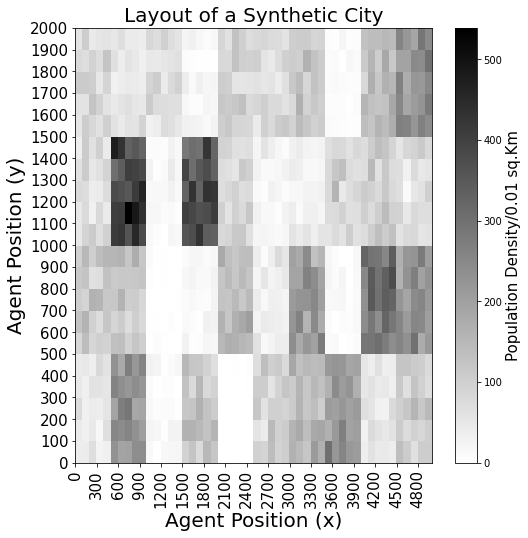

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(122)
axes = plt.axes(xlim=(0, 5000), ylim=(0, 2000),xticks=np.arange(0, 5100, step=100),yticks=np.arange(0, 2100, step=100))
plt.xticks(fontsize=15,rotation=90)
axes.set_xticks(axes.get_xticks()[::3])
plt.yticks(fontsize=15)
axes.grid(color='grey', linestyle='-')
plt.hist2d(data[:,0],data[:,1],bins=bins, cmap=plt.cm.binary)
cb=plt.colorbar()
plt.title('Layout of a Synthetic City',fontsize=20)
plt.xlabel('Agent Position (x)',fontsize=20)
plt.ylabel('Agent Position (y)',fontsize=20)
cb.set_label('Population Density/0.01 sq.Km',fontsize=15)

In [ ]:
School = [[2000,2500,300,500],[1000,1500,300,500],,[3000,3400,600,800],
          [3500,4000,1300,1500],[600,1000,1100,1500],[2600,2800,1600,1800]]
Office = [[2000,2500,0,300],[1000,1500,0,300],,[3500,4000,1000,1300],
          [2000,3000,500,1000]]
Market = [[2500,3500,1000,1500],[1000,1500,0,500],[1500,2000,1500,2000],[0,500,1000,1300],[3500,4000,1500,2000]]

In [ ]:
household_position = np.column_stack((loc[0], loc[1]))
agent_position = np.column_stack((Agents_X, Agents_Y))
np.savetxt('blore_household_location.dat', household_position)
np.savetxt('blore_agent_location.dat',agent_position)
np.savetxt('blore_block.dat', loc[2])
np.savetxt('blore_griddensity.dat', grid[1])
np.savetxt('blore_gridlimit.dat', grid[2])
np.savetxt('blore_blocklimit.dat',x)
np.savetxt('blore_Age.dat',Age)
np.savetxt('blore_Age_House.dat',Age_House)
np.savetxt('blore_House_number.dat',House_number)
np.savetxt('blore_House_sum.dat',house_sum)
np.savetxt('blore_house_numbers_size.dat',household_numbers_by_size)

In [ ]:
files.download('blore_household_location.dat')
files.download('blore_agent_location.dat')
files.download('blore_block.dat')
files.download('blore_griddensity.dat')
files.download('blore_gridlimit.dat')
files.download('blore_blocklimit.dat')
files.download('blore_Age.dat')
files.download('blore_Age_House.dat')
files.download('blore_House_number.dat')
files.download('blore_House_sum.dat')
files.download('blore_house_numbers_size.dat')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Lucknow**

In [ ]:
import numpy as np 
# total population size
Population = 64560
# Children, Adults and Seniors
Demography_dist = np.array([0.2516,0.6835,1-(0.2516+0.6835)])
out = np.random.choice(len(Demography_dist), size=Population, p=Demography_dist)
_, Demography = np.unique(out, return_counts=True)

Households = 12270
Households_dist = np.array([0.0276,0.0658,0.1193,0.2239,0.1977,0.1354,0.2303])
out = np.random.choice(len(Households_dist), size=Households, p=Households_dist)
_, Household_size_distribution = np.unique(out, return_counts=True)

def distributeHouseholds(Population, Household_size_distribution):
    Household_value = np.arange(len(Household_size_distribution))+1
    remaining = Population-(Household_value*Household_size_distribution)[:-1].sum()
    out = np.random.choice(14, size=remaining)
    remaining_value, remaining_count = np.unique(out, return_counts=True)
    remaining_value+=7
    remaining_households_size_dist = (remaining_count/remaining_value).round()

    total_households_size_dist = np.concatenate((Household_size_distribution[:-1], remaining_households_size_dist)).astype(np.int)
    population_count = np.arange(20)+1
    pred_population = (population_count*total_households_size_dist).sum() 
    diff = Population-pred_population

    while(diff!=0):
        sign = 1 if diff>0 else -1
        diff = abs(diff)
        d, r = diff//20, diff%20
        total_households_size_dist[19]+=d*(sign)
        total_households_size_dist[r-1]+=(sign)
        diff-=(d*20+r)
    return total_households_size_dist

new_Household_size_distribution = distributeHouseholds(Population, Household_size_distribution)
population_count = np.arange(20)+1
pred_population = (population_count*new_Household_size_distribution).sum()
print(pred_population, Population)

64560 64560


In [ ]:
new_Household_size_distribution*np.arange(1,21)

array([  336,  1568,  4566, 10748, 12030,  9918,  1827,  1808,  1881,
        1770,  1892,  1728,  1794,  1764,  1890,  1824,  1751,  1764,
        1881,  1820])

In [ ]:
import numpy as np
Population = 64560
households = 11472
household_size = np.zeros(households,dtype=np.int)
household_numbers_by_size = np.array([336,784,1522,2687,2406,1653,261,226,209,177,172,144,138,126,126,114,103,98,99,91])
age_composition = np.array([[0,253,83],[27,1244,297],[625,3694,247],[2519,7865,364],[3055,8232,743],
                            [2814,6414,690],[518,1182,127],[513,1169,126],[534,1217,130],[502,1145,123],
                            [537,1224,131],[490,1118,120],[509,1160,125],[500,1141,123],[537,1222,131],
                            [517,1180,127],[497,1132,122],[500,1141,123],[533,1217,131],[516,1177,127]])
# Number of Children, Adults and Seniors
Demography = np.array([ 16243,44127,4190])
Age = np.zeros(Population,dtype=np.int)
Age[:Demography[1]] = 1
Age[Demography[1]:np.sum(Demography[1:])] = 2
Age_House = np.zeros(Population,dtype=np.int)
Children = np.where(Age==0)[0]
Adults = np.where(Age==1)[0]
Seniors = np.where(Age==2)[0]
for i in range(19):
  Age_House[Children[np.sum(age_composition[:(i+1),0]):np.sum(age_composition[:(i+2),0])]]=i+2 
  Age_House[Adults[np.sum(age_composition[:(i+1),1]):np.sum(age_composition[:(i+2),1])]]=i+2 
  Age_House[Seniors[np.sum(age_composition[:(i+1),2]):np.sum(age_composition[:(i+2),2])]]=i+2 
House_number = np.zeros(Population,dtype=np.int)
house_sum=np.zeros(20,dtype=np.int)
house_sum[0] = household_numbers_by_size[0]
for i in range(1,20):
  house_sum[i] = np.sum(household_numbers_by_size[:i+1])
for j in range(1,20):
  x=np.where(Age_House==j+1)[0]
  np.random.shuffle(x)
  y=np.arange(household_numbers_by_size[j]*(j+1)+(j+1),step=j+1)
  for k in range(household_numbers_by_size[j]):
    House_number[x[y[k]:y[k+1]]]= house_sum[j-1]+k  
House_number[Age_House==0]=np.arange(household_numbers_by_size[0])

In [ ]:
np.sum(age_composition,1)

array([  336,  1568,  4566, 10748, 12030,  9918,  1827,  1808,  1881,
        1770,  1892,  1728,  1794,  1764,  1890,  1824,  1751,  1764,
        1881,  1820])

In [ ]:
class Square_Layout(IntEnum):
    """
    Details of the Layout 
    """
    # Length of the square box
    xmin = 0
    xmax = 5000 
    ymin = 0
    ymax = 2000 
    Lspace = 500
    # Number of grids
    G = xmax/Lspace * ymax/Lspace
    # Number of grids occupied
    nmin = 0.75*G
    nmax = G
    
class Population(IntEnum):
    """
    Details of the Population
    """
    # Population
    N = 64560
    households = 11472  

In [ ]:
def random_sum_to(n,num_terms):
    a = r.sample(range(1, n), num_terms) + [0, n]
    list.sort(a)
    return [a[i+1] - a[i] for i in range(len(a) - 1)]

def generate(count, lower_limits, upper_limits):
    width = upper_limits - lower_limits
    return (lower_limits + np.random.rand(1, count) * width)

def Grid():
    """
    Details of the location of agents
    """
    num_terms = r.randint(Square_Layout.nmin, Square_Layout.nmax)
    # Number per grid
    density = np.zeros(Square_Layout.G,dtype = np.int)
    # Density
    density[r.sample(range(0, Square_Layout.G), num_terms+1)] = random_sum_to(Population.households,num_terms)
    # Position limits
    xlimits = np.linspace(Square_Layout.xmin,Square_Layout.xmax,num = Square_Layout.xmax//Square_Layout.Lspace + 1,endpoint = True)
    limit_list = []
    for i in range(0,np.size(xlimits)-1):
      limit_list.append((xlimits[i],xlimits[i+1]))
    grid = np.reshape(density,(Square_Layout.xmax//Square_Layout.Lspace,Square_Layout.ymax//Square_Layout.Lspace))
    return density, grid, limit_list

def Location(density,grid,limit_list):
    """
    Location of agents
    """
    # Location of agents
    x_location = np.zeros(Population.households,dtype = np.float)
    y_location = np.zeros(Population.households,dtype = np.float)
    indices = list(range(0,Population.households))
    r.shuffle(indices)
    cum = np.append(0,np.cumsum(density))
    c = 0
    block=np.zeros(Population.households,dtype=np.int)
    for i in range(0,Square_Layout.xmax//Square_Layout.Lspace):
        for j in range(0,Square_Layout.ymax//Square_Layout.Lspace):
            x_location[indices[cum[c]:cum[c+1]]] = np.random.uniform(limit_list[i][0],limit_list[i][1],grid[i,j])
            y_location[indices[cum[c]:cum[c+1]]] = np.random.uniform(limit_list[j][0],limit_list[j][1],grid[i,j])
            block[indices[cum[c]:cum[c+1]]] = c
            c+=1            
    return x_location,y_location,block
grid = Grid()
loc = Location(grid[0],grid[1],grid[2])  
# Limits for each block
x = []
limit_list = grid[2]
for i in range(0,Square_Layout.xmax//Square_Layout.Lspace):
    for j in range(0,Square_Layout.xmax//Square_Layout.Lspace):
        x.append([limit_list[j][0],limit_list[j][1],limit_list[i][0],limit_list[i][1]])  
#data = np.column_stack((loc[0], loc[1])) 
Agents_X = loc[0][House_number] + np.random.uniform(-5,5,(Population.N))
Agents_Y = loc[1][House_number] + np.random.uniform(-5,5,(Population.N))
Agents_X[np.where(Agents_X>5000)] = np.random.uniform(4995,5000,(Population.N))[np.where(Agents_X>5000)[0]]
Agents_X[np.where(Agents_X<0)] = np.random.uniform(0,5,(Population.N))[np.where(Agents_X<0)[0]]
Agents_Y[np.where(Agents_Y>2000)] = np.random.uniform(1995,2000,(Population.N))[np.where(Agents_Y>2000)[0]]
Agents_Y[np.where(Agents_Y<0)] = np.random.uniform(0,5,(Population.N))[np.where(Agents_Y<0)[0]]

In [ ]:
np.sum(age_composition,1)

array([ 382, 1028, 1893, 3632, 4335, 2940,  434,  432,  459,  500,  462,
        444,  481,  434,  450,  464,  442,  450,  418,  500])

In [ ]:
#from google.colab import files
#uploaded = files.upload()
data = np.loadtxt('lucknow_agent_location.dat')

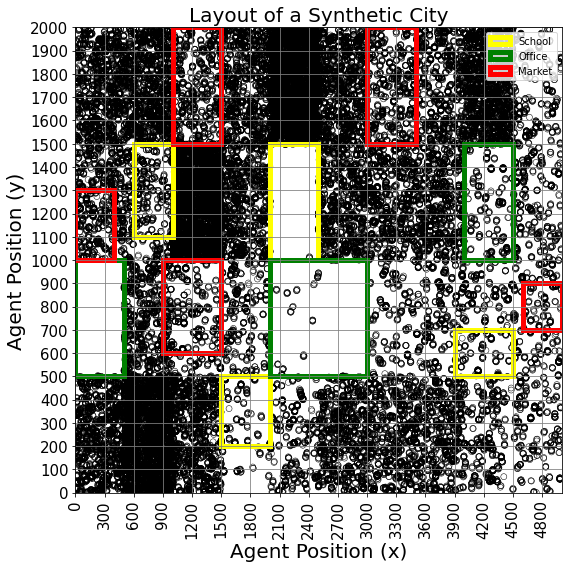

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(121)
axes = plt.axes(xlim=(0, 5000), ylim=(0, 2000),xticks=np.arange(0, 5100, step=100),yticks=np.arange(0, 2100, step=100))
plt.xticks(fontsize=15,rotation=90)
axes.set_xticks(axes.get_xticks()[::3])
plt.yticks(fontsize=15)
axes.grid(color='grey', linestyle='-')
axes.scatter(data[:,0],data[:,1],marker='o',facecolor='none',edgecolor = 'k', lw=0.5)
# Schools
axes.add_patch(Rectangle((1500, 200), 500, 300,ec="yellow",fc='None',lw=5,label='School'))
axes.add_patch(Rectangle((2000, 1000), 500, 500,ec="yellow",fc='None',lw=5))
axes.add_patch(Rectangle((600, 1100), 400, 400,ec="yellow",fc='None',lw=5))
axes.add_patch(Rectangle((3900, 500), 600, 200,ec="yellow",fc='None',lw=5))

# Offices
axes.add_patch(Rectangle((0, 500), 500, 500,ec="green",fc='None',lw=5,label='Office'))
axes.add_patch(Rectangle((4000,1000), 500, 500,ec="green",fc='None',lw=5))
axes.add_patch(Rectangle((2000, 500), 1000, 500,ec="green",fc='None',lw=5))
# Markets
axes.add_patch(Rectangle((3000, 1500), 500, 500,ec="red",fc='None',lw=5,label='Market'))
axes.add_patch(Rectangle((4600, 700), 400, 200,ec="red",fc='None',lw=5))
axes.add_patch(Rectangle((900, 600), 600, 400,ec="red",fc='None',lw=5))
axes.add_patch(Rectangle((0, 1000), 400, 300,ec="red",fc='None',lw=5))
axes.add_patch(Rectangle((1000, 1500), 500, 500,ec="red",fc='None',lw=5))

axes.legend(loc='upper right')
plt.title('Layout of a Synthetic City',fontsize=20)
plt.xlabel('Agent Position (x)',fontsize=20)
plt.ylabel('Agent Position (y)',fontsize=20)
plt.tight_layout()

In [ ]:
plt.savefig('Lucknow_Layout_Scatter.pdf',format='pdf', bbox_inches='tight',Transparent=True)
files.download('Lucknow_Layout_Scatter.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

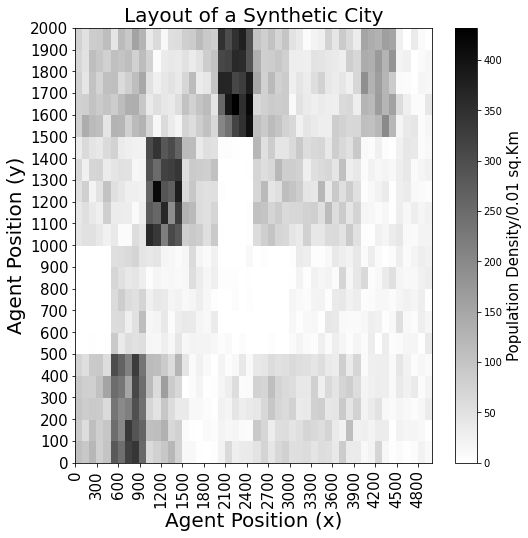

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(122)
axes = plt.axes(xlim=(0, 5000), ylim=(0, 2000),xticks=np.arange(0, 5100, step=100),yticks=np.arange(0, 2100, step=100))
plt.xticks(fontsize=15,rotation=90)
axes.set_xticks(axes.get_xticks()[::3])
plt.yticks(fontsize=15)
axes.grid(color='grey', linestyle='-')
plt.hist2d(data[:,0],data[:,1],bins=bins, cmap=plt.cm.binary)
cb=plt.colorbar()
plt.title('Layout of a Synthetic City',fontsize=20)
plt.xlabel('Agent Position (x)',fontsize=20)
plt.ylabel('Agent Position (y)',fontsize=20)
cb.set_label('Population Density/0.01 sq.Km',fontsize=15)

In [ ]:
plt.savefig('Lucknow_Layout_Heat.pdf',format='pdf', bbox_inches='tight',Transparent=True)
files.download('Lucknow_Layout_Heat.pdf')

In [ ]:
household_position = np.column_stack((loc[0], loc[1]))
agent_position = np.column_stack((Agents_X, Agents_Y))
np.savetxt('lucknow_household_location.dat', household_position)
np.savetxt('lucknow_agent_location.dat',agent_position)
np.savetxt('lucknow_block.dat', loc[2])
np.savetxt('lucknow_griddensity.dat', grid[1])
np.savetxt('lucknow_gridlimit.dat', grid[2])
np.savetxt('lucknow_blocklimit.dat',x)
np.savetxt('lucknow_Age.dat',Age)
np.savetxt('lucknow_Age_House.dat',Age_House)
np.savetxt('lucknow_House_number.dat',House_number)
np.savetxt('lucknow_House_sum.dat',house_sum)
np.savetxt('lucknow_house_numbers_size.dat',household_numbers_by_size)

In [ ]:
files.download('lucknow_household_location.dat')
files.download('lucknow_agent_location.dat')
files.download('lucknow_block.dat')
files.download('lucknow_griddensity.dat')
files.download('lucknow_gridlimit.dat')
files.download('lucknow_blocklimit.dat')
files.download('lucknow_Age.dat')
files.download('lucknow_Age_House.dat')
files.download('lucknow_House_number.dat')
files.download('lucknow_House_sum.dat')
files.download('lucknow_house_numbers_size.dat')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Diu**

In [ ]:
import numpy as np 
# total population size
Population = 20580
# Children, Adults and Seniors
Demography_dist = np.array([0.308,0.634,1-(0.308+0.634)])
out = np.random.choice(len(Demography_dist), size=Population, p=Demography_dist)
_, Demography = np.unique(out, return_counts=True)

Households = 4500
Households_dist = np.array([0.0886,0.1136,0.1317,0.2014,0.1922,0.1117,0.1608])

out = np.random.choice(len(Households_dist), size=Households, p=Households_dist)
_, Household_size_distribution = np.unique(out, return_counts=True)

def distributeHouseholds(Population, Household_size_distribution):
    Household_value = np.arange(len(Household_size_distribution))+1
    remaining = Population-(Household_value*Household_size_distribution)[:-1].sum()
    out = np.random.choice(14, size=remaining)
    remaining_value, remaining_count = np.unique(out, return_counts=True)
    remaining_value+=7
    remaining_households_size_dist = (remaining_count/remaining_value).round()

    total_households_size_dist = np.concatenate((Household_size_distribution[:-1], remaining_households_size_dist)).astype(np.int)
    population_count = np.arange(20)+1
    pred_population = (population_count*total_households_size_dist).sum() 
    diff = Population-pred_population

    while(diff!=0):
        sign = 1 if diff>0 else -1
        diff = abs(diff)
        d, r = diff//20, diff%20
        total_households_size_dist[19]+=d*(sign)
        total_households_size_dist[r-1]+=(sign)
        diff-=(d*20+r)
    return total_households_size_dist

new_Household_size_distribution = distributeHouseholds(Population, Household_size_distribution)
population_count = np.arange(20)+1
pred_population = (population_count*new_Household_size_distribution).sum()
print(pred_population, Population)

20580 20580


In [ ]:
new_Household_size_distribution

array([382, 514, 631, 908, 867, 490,  62,  54,  51,  50,  42,  37,  37,
        31,  30,  29,  26,  25,  22,  25])

In [ ]:
np.sum(new_Household_size_distribution)

4313

In [ ]:
new_Household_size_distribution*np.arange(1,21)

array([ 382, 1028, 1893, 3632, 4335, 2940,  434,  432,  459,  500,  462,
        444,  481,  434,  450,  464,  442,  450,  418,  500])

In [ ]:
import numpy as np
Population = 20580
households = 4313
household_size = np.zeros(households,dtype=np.int)
household_numbers_by_size = np.array([382,514,631,908,867,490,62,54,51,50,42,37,37,31,30,29,26,25,22,25])
age_composition = np.array([[0,295,87],[25,825,178],[354,1451,88],[1116,2415,101],[1436,2681,218],
                            [1076,1699,165],[159,251,24],[158,250,24],[168,265,26],[183,289,28],
                            [169,267,26],[162,257,25],[176,278,27],[159,251,24],[165,260,25],
                            [170,268,26],[162,255,25],[165,260,25],[153,242,23],[183,289,28]])
# Number of Children, Adults and Seniors
Demography = np.array([ 6339,13048,1193])
Age = np.zeros(Population,dtype=np.int)
Age[:Demography[1]] = 1
Age[Demography[1]:np.sum(Demography[1:])] = 2
Age_House = np.zeros(Population,dtype=np.int)
Children = np.where(Age==0)[0]
Adults = np.where(Age==1)[0]
Seniors = np.where(Age==2)[0]
for i in range(19):
  Age_House[Children[np.sum(age_composition[:(i+1),0]):np.sum(age_composition[:(i+2),0])]]=i+2 
  Age_House[Adults[np.sum(age_composition[:(i+1),1]):np.sum(age_composition[:(i+2),1])]]=i+2 
  Age_House[Seniors[np.sum(age_composition[:(i+1),2]):np.sum(age_composition[:(i+2),2])]]=i+2 
House_number = np.zeros(Population,dtype=np.int)
house_sum=np.zeros(20,dtype=np.int)
house_sum[0] = household_numbers_by_size[0]
for i in range(1,20):
  house_sum[i] = np.sum(household_numbers_by_size[:i+1])
for j in range(1,20):
  x=np.where(Age_House==j+1)[0]
  np.random.shuffle(x)
  y=np.arange(household_numbers_by_size[j]*(j+1)+(j+1),step=j+1)
  for k in range(household_numbers_by_size[j]):
    House_number[x[y[k]:y[k+1]]]= house_sum[j-1]+k  
House_number[Age_House==0]=np.arange(household_numbers_by_size[0])

In [ ]:
np.sum(age_composition,1)

array([ 382, 1028, 1893, 3632, 4335, 2940,  434,  432,  459,  500,  462,
        444,  481,  434,  450,  464,  442,  450,  418,  500])

In [ ]:
class Square_Layout(IntEnum):
    """
    Details of the Layout 
    """
    # Length of the square box
    xmin = 0
    xmax = 5000 
    ymin = 0
    ymax = 2000 
    Lspace = 500
    # Number of grids
    G = xmax/Lspace * ymax/Lspace
    # Number of grids occupied
    nmin = 0.75*G
    nmax = G
    
class Population(IntEnum):
    """
    Details of the Population
    """
    # Population
    N = 20580
    households = 4313  

In [ ]:
def random_sum_to(n,num_terms):
    a = r.sample(range(1, n), num_terms) + [0, n]
    list.sort(a)
    return [a[i+1] - a[i] for i in range(len(a) - 1)]

def generate(count, lower_limits, upper_limits):
    width = upper_limits - lower_limits
    return (lower_limits + np.random.rand(1, count) * width)

def Grid():
    """
    Details of the location of agents
    """
    num_terms = r.randint(Square_Layout.nmin, Square_Layout.nmax)
    # Number per grid
    density = np.zeros(Square_Layout.G,dtype = np.int)
    # Density
    density[r.sample(range(0, Square_Layout.G), num_terms+1)] = random_sum_to(Population.households,num_terms)
    # Position limits
    xlimits = np.linspace(Square_Layout.xmin,Square_Layout.xmax,num = Square_Layout.xmax//Square_Layout.Lspace + 1,endpoint = True)
    limit_list = []
    for i in range(0,np.size(xlimits)-1):
      limit_list.append((xlimits[i],xlimits[i+1]))
    grid = np.reshape(density,(Square_Layout.xmax//Square_Layout.Lspace,Square_Layout.ymax//Square_Layout.Lspace))
    return density, grid, limit_list

def Location(density,grid,limit_list):
    """
    Location of agents
    """
    # Location of agents
    x_location = np.zeros(Population.households,dtype = np.float)
    y_location = np.zeros(Population.households,dtype = np.float)
    indices = list(range(0,Population.households))
    r.shuffle(indices)
    cum = np.append(0,np.cumsum(density))
    c = 0
    block=np.zeros(Population.households,dtype=np.int)
    for i in range(0,Square_Layout.xmax//Square_Layout.Lspace):
        for j in range(0,Square_Layout.ymax//Square_Layout.Lspace):
            x_location[indices[cum[c]:cum[c+1]]] = np.random.uniform(limit_list[i][0],limit_list[i][1],grid[i,j])
            y_location[indices[cum[c]:cum[c+1]]] = np.random.uniform(limit_list[j][0],limit_list[j][1],grid[i,j])
            block[indices[cum[c]:cum[c+1]]] = c
            c+=1            
    return x_location,y_location,block
grid = Grid()
loc = Location(grid[0],grid[1],grid[2])  
# Limits for each block
x = []
limit_list = grid[2]
for i in range(0,Square_Layout.xmax//Square_Layout.Lspace):
    for j in range(0,Square_Layout.xmax//Square_Layout.Lspace):
        x.append([limit_list[j][0],limit_list[j][1],limit_list[i][0],limit_list[i][1]])  
#data = np.column_stack((loc[0], loc[1])) 
Agents_X = loc[0][House_number] + np.random.uniform(-5,5,(Population.N))
Agents_Y = loc[1][House_number] + np.random.uniform(-5,5,(Population.N))
Agents_X[np.where(Agents_X>5000)] = np.random.uniform(4995,5000,(Population.N))[np.where(Agents_X>5000)[0]]
Agents_X[np.where(Agents_X<0)] = np.random.uniform(0,5,(Population.N))[np.where(Agents_X<0)[0]]
Agents_Y[np.where(Agents_Y>2000)] = np.random.uniform(1995,2000,(Population.N))[np.where(Agents_Y>2000)[0]]
Agents_Y[np.where(Agents_Y<0)] = np.random.uniform(0,5,(Population.N))[np.where(Agents_Y<0)[0]]

In [ ]:
#from google.colab import files
#uploaded = files.upload()
data = np.loadtxt('diu_agent_location.dat')

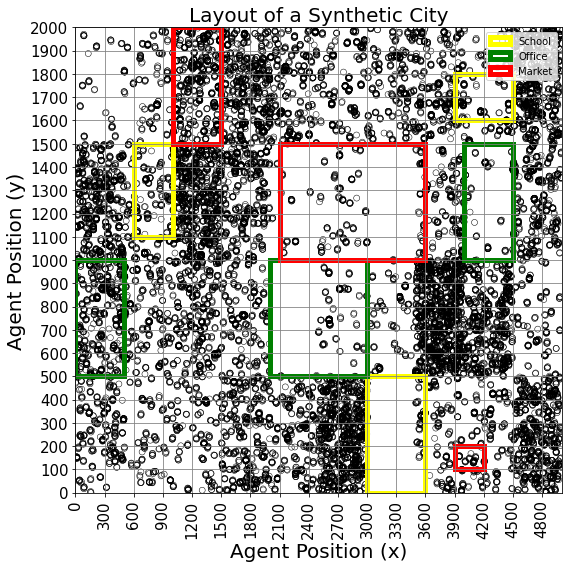

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(121)
axes = plt.axes(xlim=(0, 5000), ylim=(0, 2000),xticks=np.arange(0, 5100, step=100),yticks=np.arange(0, 2100, step=100))
plt.xticks(fontsize=15,rotation=90)
axes.set_xticks(axes.get_xticks()[::3])
plt.yticks(fontsize=15)
axes.grid(color='grey', linestyle='-')
axes.scatter(data[:,0],data[:,1],marker='o',facecolor='none',edgecolor = 'k', lw=0.5)
# Schools
axes.add_patch(Rectangle((3000,0), 600, 500,ec="yellow",fc='None',lw=5,label='School'))
axes.add_patch(Rectangle((600, 1100), 400, 400,ec="yellow",fc='None',lw=5))
axes.add_patch(Rectangle((3900, 1600), 600, 200,ec="yellow",fc='None',lw=5))

# Offices
axes.add_patch(Rectangle((0, 500), 500, 500,ec="green",fc='None',lw=5,label='Office'))
axes.add_patch(Rectangle((4000,1000), 500, 500,ec="green",fc='None',lw=5))
axes.add_patch(Rectangle((2000, 500), 1000, 500,ec="green",fc='None',lw=5))
# Markets
axes.add_patch(Rectangle((2100, 1000), 1500, 500,ec="red",fc='None',lw=5,label='Market'))
axes.add_patch(Rectangle((3900, 100), 300, 100,ec="red",fc='None',lw=5))
axes.add_patch(Rectangle((1000, 1500), 500, 500,ec="red",fc='None',lw=5))

axes.legend(loc='upper right')
plt.title('Layout of a Synthetic City',fontsize=20)
plt.xlabel('Agent Position (x)',fontsize=20)
plt.ylabel('Agent Position (y)',fontsize=20)
plt.tight_layout()

In [ ]:
plt.savefig('Diu_Layout_Scatter.pdf',format='pdf', bbox_inches='tight',Transparent=True)
files.download('Diu_Layout_Scatter.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

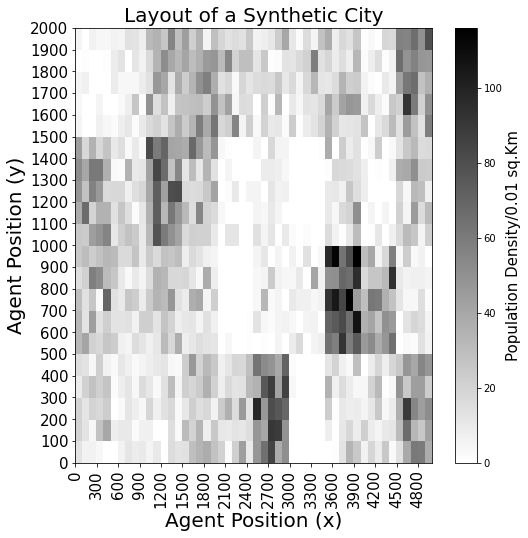

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(122)
axes = plt.axes(xlim=(0, 5000), ylim=(0, 2000),xticks=np.arange(0, 5100, step=100),yticks=np.arange(0, 2100, step=100))
plt.xticks(fontsize=15,rotation=90)
axes.set_xticks(axes.get_xticks()[::3])
plt.yticks(fontsize=15)
axes.grid(color='grey', linestyle='-')
plt.hist2d(data[:,0],data[:,1],bins=bins, cmap=plt.cm.binary)
cb=plt.colorbar()
plt.title('Layout of a Synthetic City',fontsize=20)
plt.xlabel('Agent Position (x)',fontsize=20)
plt.ylabel('Agent Position (y)',fontsize=20)
cb.set_label('Population Density/0.01 sq.Km',fontsize=15)

In [ ]:
plt.savefig('Diu_Layout_Heat.pdf',format='pdf', bbox_inches='tight',Transparent=True)
files.download('Diu_Layout_Heat.pdf')

In [ ]:
household_position = np.column_stack((loc[0], loc[1]))
agent_position = np.column_stack((Agents_X, Agents_Y))
np.savetxt('diu_household_location.dat', household_position)
np.savetxt('diu_agent_location.dat',agent_position)
np.savetxt('diu_block.dat', loc[2])
np.savetxt('diu_griddensity.dat', grid[1])
np.savetxt('diu_gridlimit.dat', grid[2])
np.savetxt('diu_blocklimit.dat',x)
np.savetxt('diu_Age.dat',Age)
np.savetxt('diu_Age_House.dat',Age_House)
np.savetxt('diu_House_number.dat',House_number)
np.savetxt('diu_House_sum.dat',house_sum)
np.savetxt('diu_house_numbers_size.dat',household_numbers_by_size)

In [ ]:
files.download('diu_household_location.dat')
files.download('diu_agent_location.dat')
files.download('diu_block.dat')
files.download('diu_griddensity.dat')
files.download('diu_gridlimit.dat')
files.download('diu_blocklimit.dat')
files.download('diu_Age.dat')
files.download('diu_Age_House.dat')
files.download('diu_House_number.dat')
files.download('diu_House_sum.dat')
files.download('diu_house_numbers_size.dat')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>